<a href="https://colab.research.google.com/github/davitiu/davitiu/blob/main/The_Magic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "Class"]
df = pd.read_csv('magic04.data', names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df['Class'] = (df['Class'] == 'g').astype(int)

In [4]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


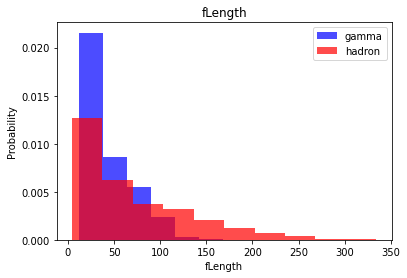

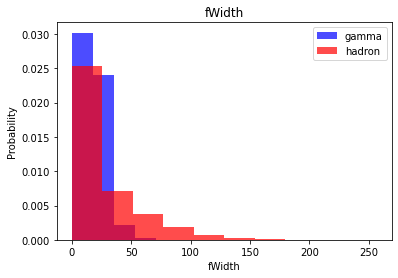

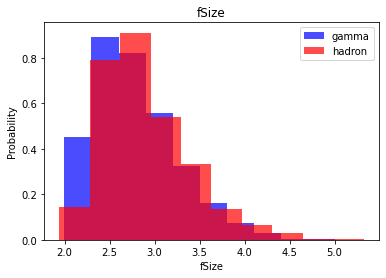

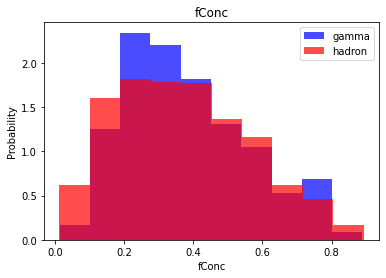

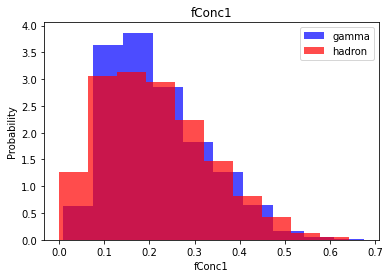

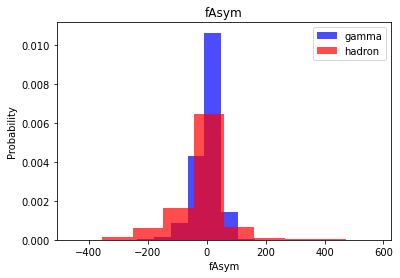

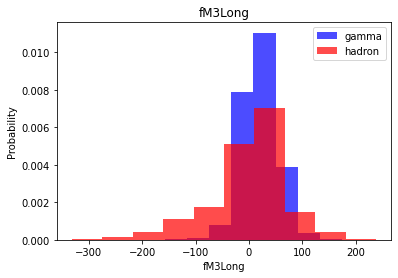

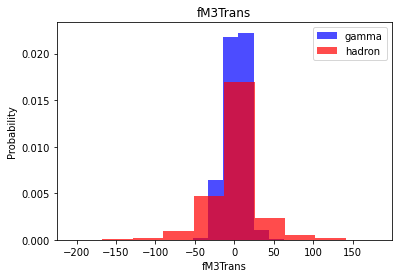

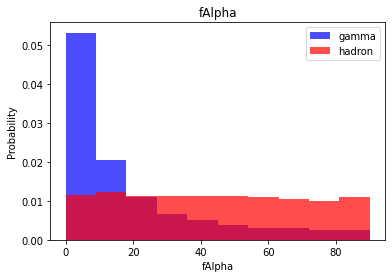

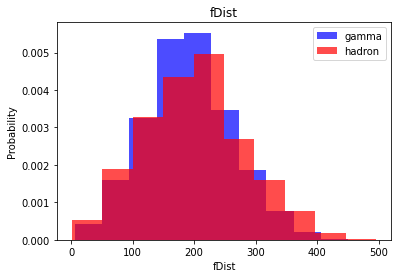

In [5]:
for label in cols[:-1]:
  plt.hist(df[df['Class']==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df['Class']==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()


# Train, validation, test datasets



In [6]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [7]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)
  data = np.hstack((X, np.reshape(y, (-1,1))))

  return data, X, y


In [8]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [9]:
len(y_train)

14810

In [10]:
sum(y_train == 1)

7405

# K Nears Neighbors

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [12]:
knn_model = KNeighborsClassifier(n_neighbors=61)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=61)

In [13]:
y_pred = knn_model.predict(X_test)

In [14]:
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [15]:
y_test

array([1, 1, 1, ..., 1, 1, 1])

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76      1317
           1       0.86      0.91      0.89      2487

    accuracy                           0.85      3804
   macro avg       0.84      0.82      0.82      3804
weighted avg       0.84      0.85      0.84      3804



# Naive Bayes classifier

In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [19]:
y_pred1 = nb_model.predict(X_test)
print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

           0       0.69      0.40      0.51      1317
           1       0.74      0.90      0.81      2487

    accuracy                           0.73      3804
   macro avg       0.72      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred2 = lr_model.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71      1317
           1       0.85      0.83      0.84      2487

    accuracy                           0.80      3804
   macro avg       0.77      0.78      0.78      3804
weighted avg       0.80      0.80      0.80      3804



#SVM

In [22]:
from sklearn.svm import SVC

In [23]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [24]:
y_pred3 = svm_model.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1317
           1       0.90      0.91      0.90      2487

    accuracy                           0.87      3804
   macro avg       0.86      0.86      0.86      3804
weighted avg       0.87      0.87      0.87      3804



# Neural Networks

In [25]:
import tensorflow as tf

In [26]:
tf.__version__

'2.9.2'

In [27]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['accuracy'], label='accuracy')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)
  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)
  plt.show()


In [28]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation="relu", input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation="relu"),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation="sigmoid")

  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
      X_train, y_train,
      epochs=epochs,
      batch_size=batch_size,
      validation_split=0.2,
      verbose=0
  )

  return nn_model, history

16 nodes, dropout probability 0, learning rate 0.01, batch size 32


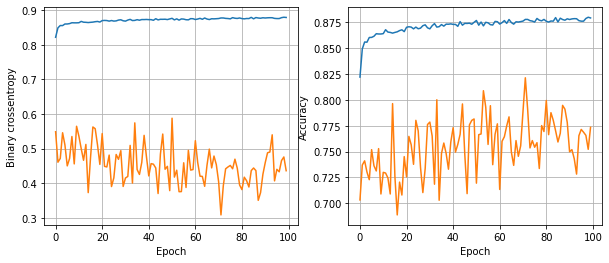

119/119 [==============================] - 0s 837us/step - loss: 0.3129 - accuracy: 0.8775
16 nodes, dropout probability 0, learning rate 0.01, batch size 64


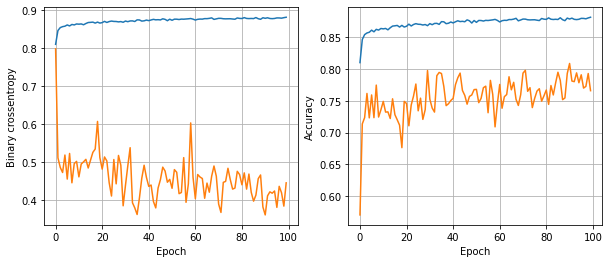

119/119 [==============================] - 0s 896us/step - loss: 0.3284 - accuracy: 0.8693
16 nodes, dropout probability 0, learning rate 0.01, batch size 128


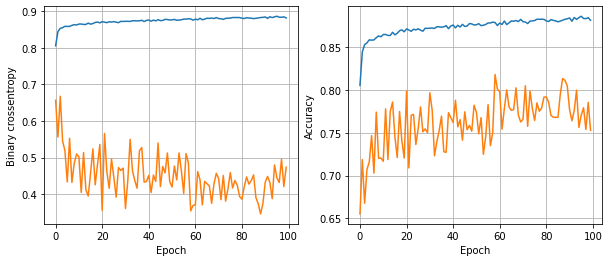

119/119 [==============================] - 0s 844us/step - loss: 0.3174 - accuracy: 0.8741
16 nodes, dropout probability 0, learning rate 0.005, batch size 32


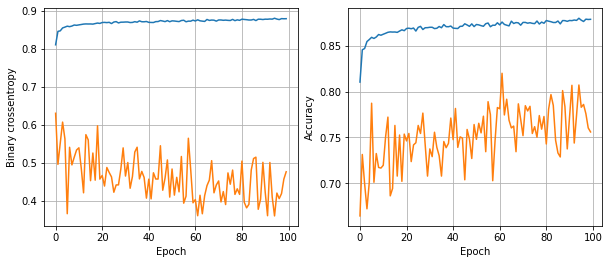

119/119 [==============================] - 0s 838us/step - loss: 0.3314 - accuracy: 0.8709
16 nodes, dropout probability 0, learning rate 0.005, batch size 64


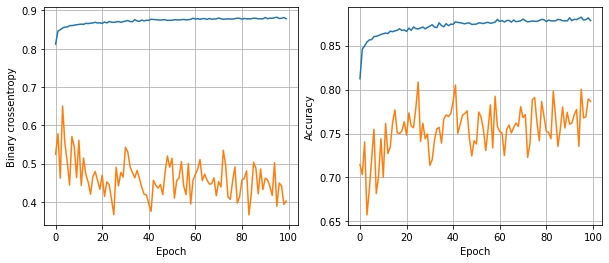

119/119 [==============================] - 0s 919us/step - loss: 0.3213 - accuracy: 0.8675
16 nodes, dropout probability 0, learning rate 0.005, batch size 128


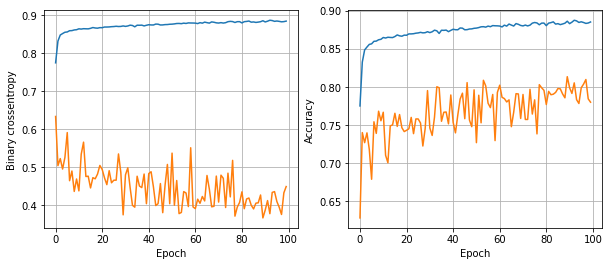

119/119 [==============================] - 0s 871us/step - loss: 0.3126 - accuracy: 0.8738
16 nodes, dropout probability 0, learning rate 0.001, batch size 32


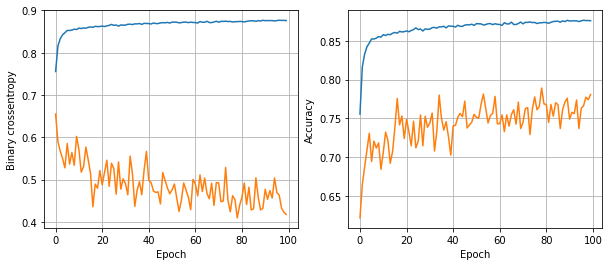

119/119 [==============================] - 0s 939us/step - loss: 0.3177 - accuracy: 0.8678
16 nodes, dropout probability 0, learning rate 0.001, batch size 64


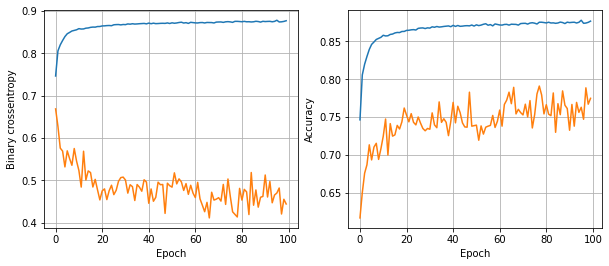

119/119 [==============================] - 0s 997us/step - loss: 0.3066 - accuracy: 0.8725
16 nodes, dropout probability 0, learning rate 0.001, batch size 128


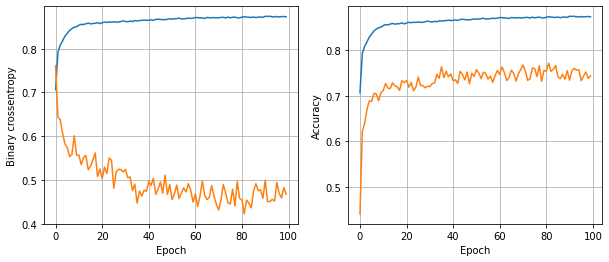

119/119 [==============================] - 0s 971us/step - loss: 0.3112 - accuracy: 0.8722
16 nodes, dropout probability 0.2, learning rate 0.01, batch size 32


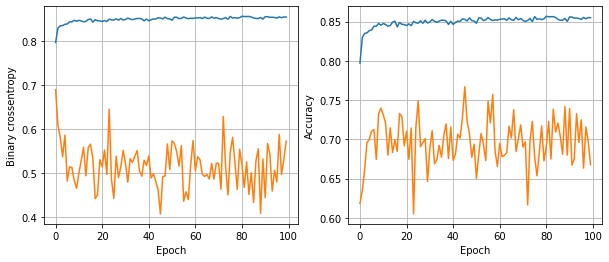

119/119 [==============================] - 0s 1ms/step - loss: 0.3314 - accuracy: 0.8596
16 nodes, dropout probability 0.2, learning rate 0.01, batch size 64


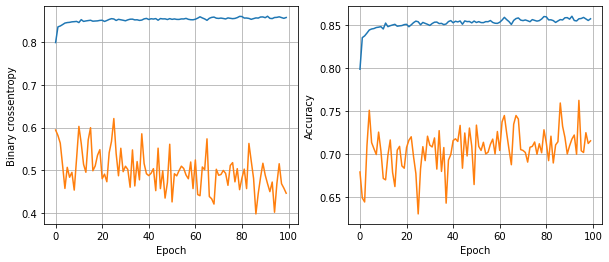

119/119 [==============================] - 0s 955us/step - loss: 0.3246 - accuracy: 0.8688
16 nodes, dropout probability 0.2, learning rate 0.01, batch size 128


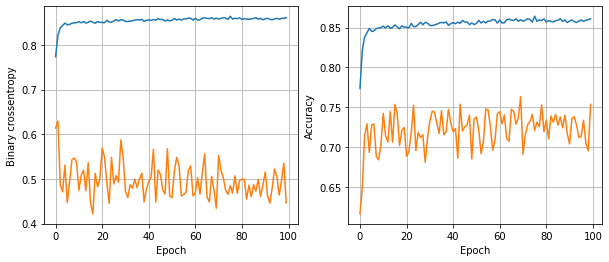

119/119 [==============================] - 0s 943us/step - loss: 0.3169 - accuracy: 0.8738
16 nodes, dropout probability 0.2, learning rate 0.005, batch size 32


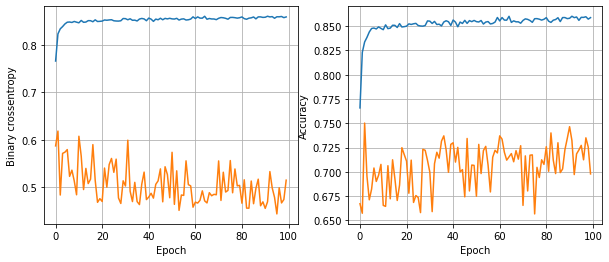

119/119 [==============================] - 0s 1ms/step - loss: 0.3185 - accuracy: 0.8701
16 nodes, dropout probability 0.2, learning rate 0.005, batch size 64


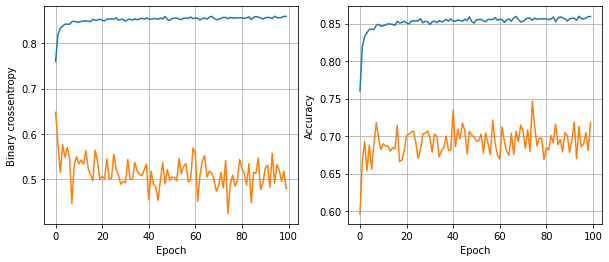

119/119 [==============================] - 0s 995us/step - loss: 0.3166 - accuracy: 0.8701
16 nodes, dropout probability 0.2, learning rate 0.005, batch size 128


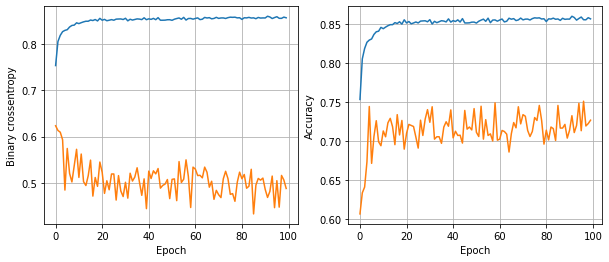

119/119 [==============================] - 0s 979us/step - loss: 0.3140 - accuracy: 0.8680
16 nodes, dropout probability 0.2, learning rate 0.001, batch size 32


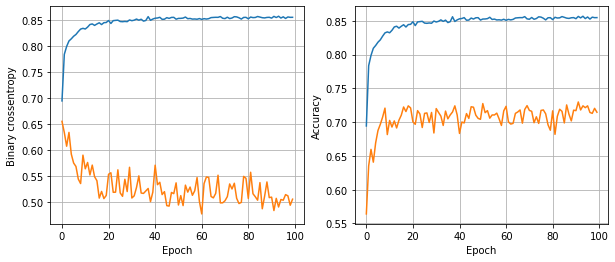

119/119 [==============================] - 0s 1ms/step - loss: 0.3199 - accuracy: 0.8636
16 nodes, dropout probability 0.2, learning rate 0.001, batch size 64


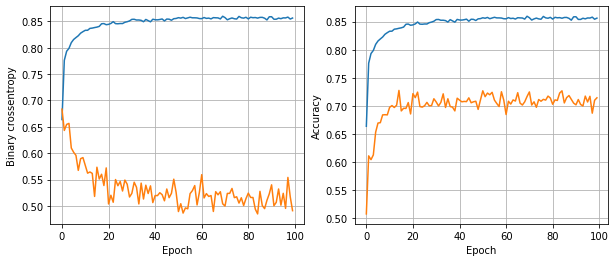

119/119 [==============================] - 0s 871us/step - loss: 0.3120 - accuracy: 0.8707
16 nodes, dropout probability 0.2, learning rate 0.001, batch size 128


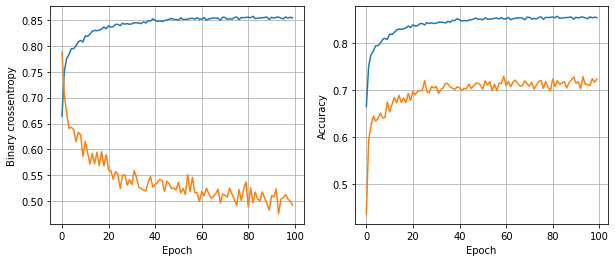

119/119 [==============================] - 0s 977us/step - loss: 0.3149 - accuracy: 0.8707
32 nodes, dropout probability 0, learning rate 0.01, batch size 32


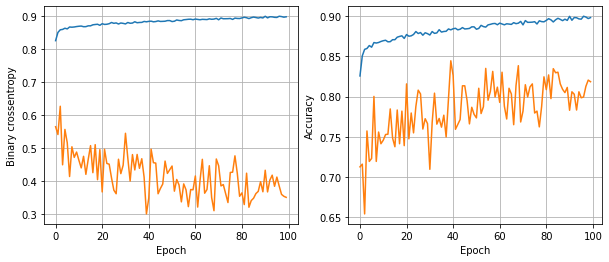

119/119 [==============================] - 0s 1ms/step - loss: 0.3711 - accuracy: 0.8649
32 nodes, dropout probability 0, learning rate 0.01, batch size 64


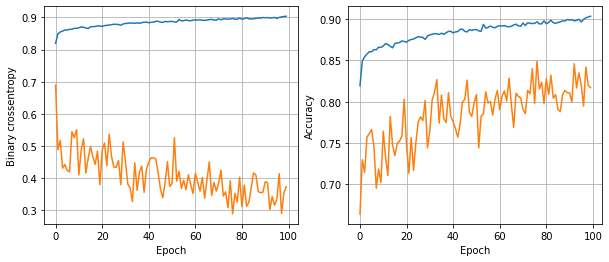

119/119 [==============================] - 0s 1ms/step - loss: 0.3889 - accuracy: 0.8670
32 nodes, dropout probability 0, learning rate 0.01, batch size 128


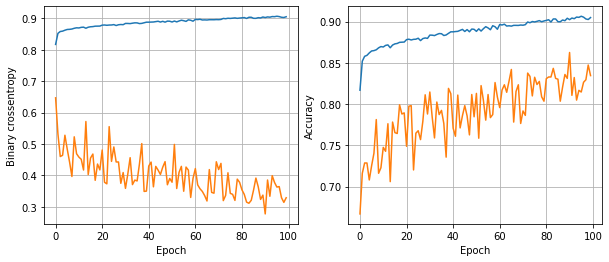

119/119 [==============================] - 0s 950us/step - loss: 0.3672 - accuracy: 0.8628
32 nodes, dropout probability 0, learning rate 0.005, batch size 32


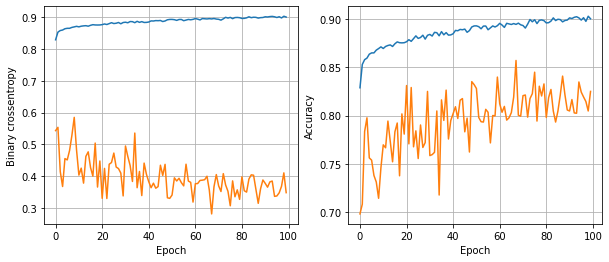

119/119 [==============================] - 0s 1ms/step - loss: 0.3740 - accuracy: 0.8649
32 nodes, dropout probability 0, learning rate 0.005, batch size 64


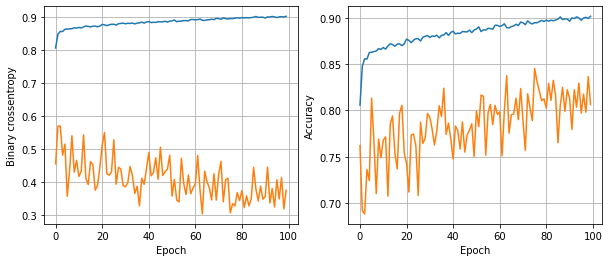

119/119 [==============================] - 0s 1ms/step - loss: 0.3681 - accuracy: 0.8612
32 nodes, dropout probability 0, learning rate 0.005, batch size 128


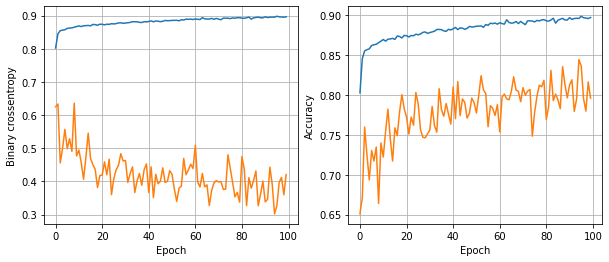

119/119 [==============================] - 0s 1ms/step - loss: 0.3475 - accuracy: 0.8638
32 nodes, dropout probability 0, learning rate 0.001, batch size 32


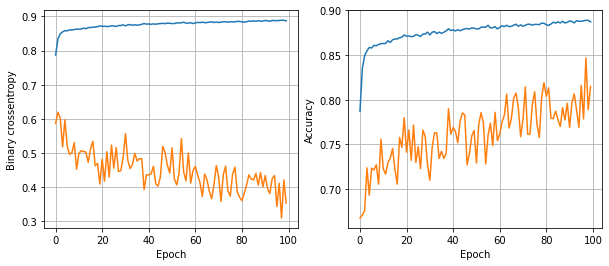

119/119 [==============================] - 0s 1ms/step - loss: 0.3147 - accuracy: 0.8725
32 nodes, dropout probability 0, learning rate 0.001, batch size 64


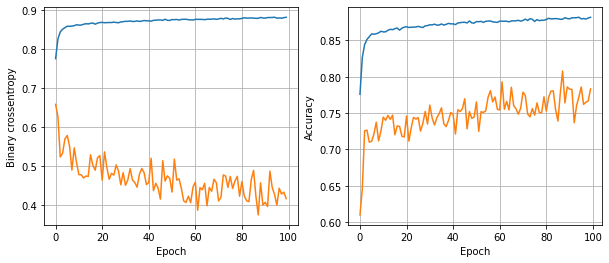

119/119 [==============================] - 0s 1ms/step - loss: 0.3165 - accuracy: 0.8720
32 nodes, dropout probability 0, learning rate 0.001, batch size 128


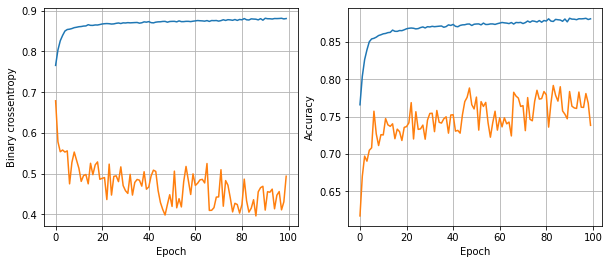

119/119 [==============================] - 0s 970us/step - loss: 0.3098 - accuracy: 0.8736
32 nodes, dropout probability 0.2, learning rate 0.01, batch size 32


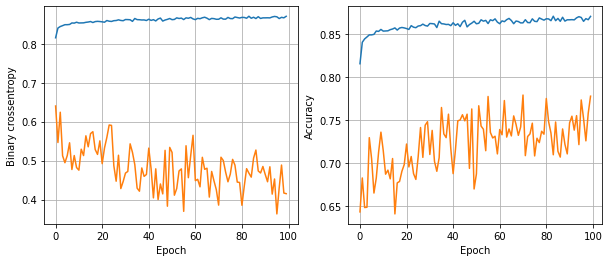

119/119 [==============================] - 0s 1ms/step - loss: 0.3074 - accuracy: 0.8791
32 nodes, dropout probability 0.2, learning rate 0.01, batch size 64


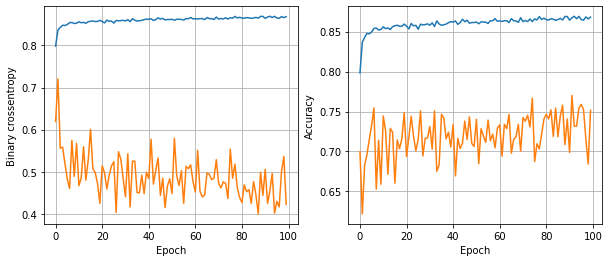

119/119 [==============================] - 0s 1ms/step - loss: 0.3045 - accuracy: 0.8749
32 nodes, dropout probability 0.2, learning rate 0.01, batch size 128


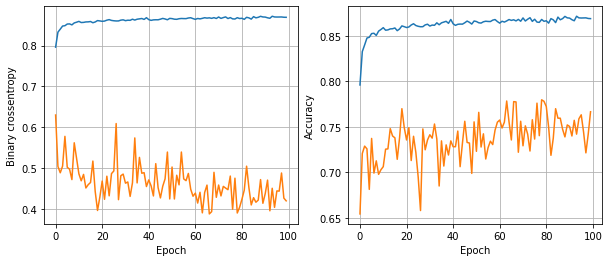

119/119 [==============================] - 0s 1ms/step - loss: 0.2987 - accuracy: 0.8775
32 nodes, dropout probability 0.2, learning rate 0.005, batch size 32


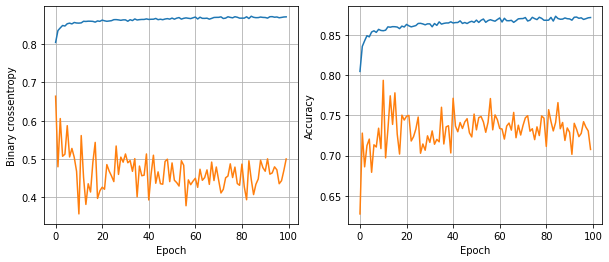

119/119 [==============================] - 0s 1ms/step - loss: 0.3078 - accuracy: 0.8730
32 nodes, dropout probability 0.2, learning rate 0.005, batch size 64


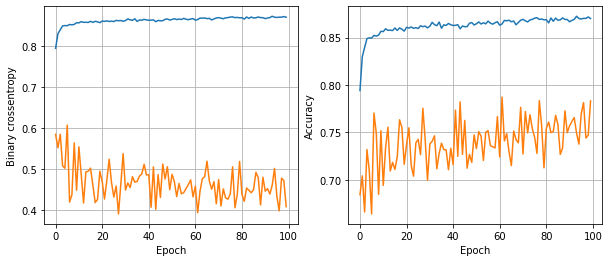

119/119 [==============================] - 0s 1ms/step - loss: 0.3014 - accuracy: 0.8783
32 nodes, dropout probability 0.2, learning rate 0.005, batch size 128


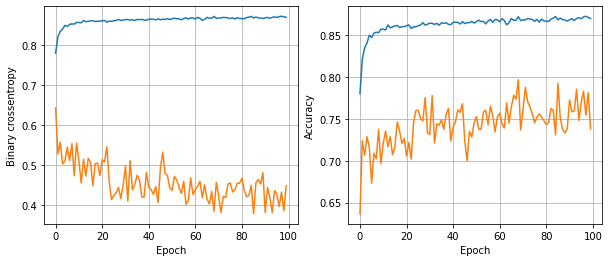

119/119 [==============================] - 0s 1ms/step - loss: 0.3006 - accuracy: 0.8764
32 nodes, dropout probability 0.2, learning rate 0.001, batch size 32


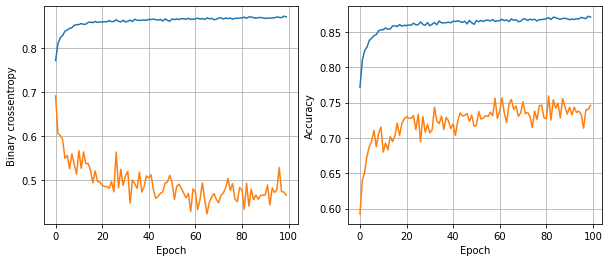

119/119 [==============================] - 0s 1ms/step - loss: 0.2936 - accuracy: 0.8775
32 nodes, dropout probability 0.2, learning rate 0.001, batch size 64


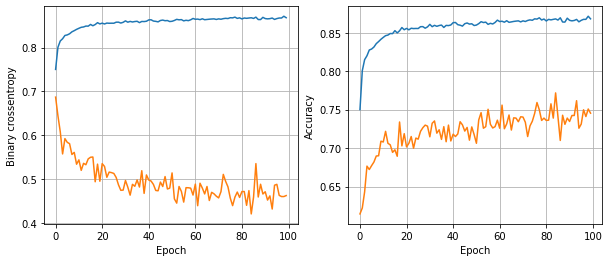

119/119 [==============================] - 0s 1ms/step - loss: 0.3005 - accuracy: 0.8751
32 nodes, dropout probability 0.2, learning rate 0.001, batch size 128


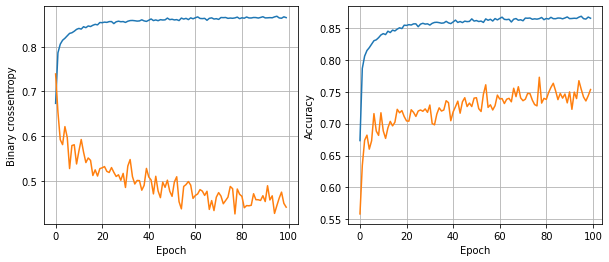

119/119 [==============================] - 0s 1ms/step - loss: 0.3054 - accuracy: 0.8743
64 nodes, dropout probability 0, learning rate 0.01, batch size 32


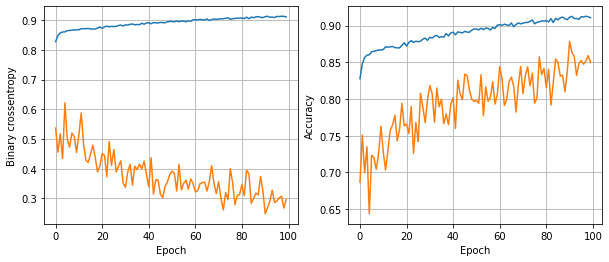

119/119 [==============================] - 0s 1ms/step - loss: 0.4812 - accuracy: 0.8651
64 nodes, dropout probability 0, learning rate 0.01, batch size 64


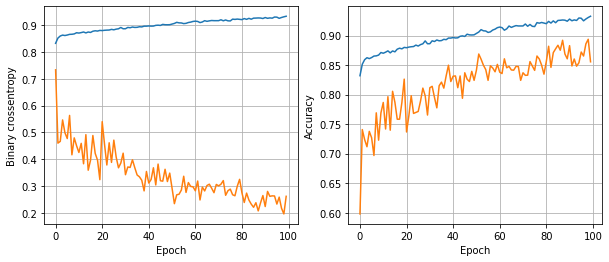

119/119 [==============================] - 0s 1ms/step - loss: 0.5883 - accuracy: 0.8473
64 nodes, dropout probability 0, learning rate 0.01, batch size 128


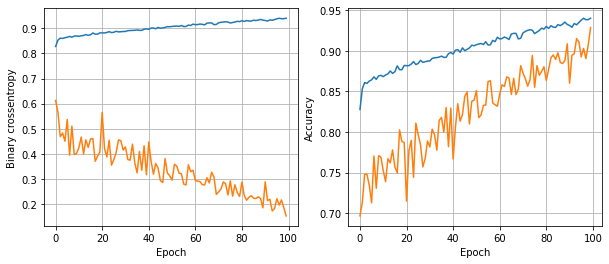

119/119 [==============================] - 0s 1ms/step - loss: 0.5998 - accuracy: 0.8517
64 nodes, dropout probability 0, learning rate 0.005, batch size 32


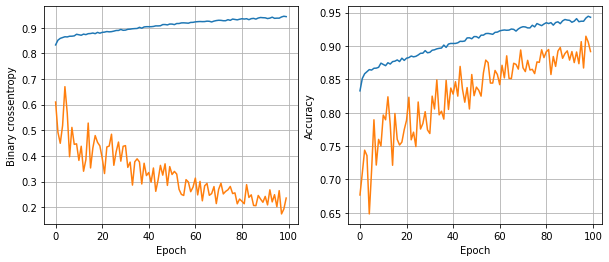

119/119 [==============================] - 0s 1ms/step - loss: 0.6563 - accuracy: 0.8565
64 nodes, dropout probability 0, learning rate 0.005, batch size 64


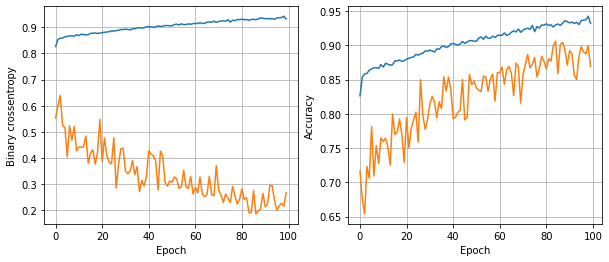

119/119 [==============================] - 0s 1ms/step - loss: 0.5639 - accuracy: 0.8567
64 nodes, dropout probability 0, learning rate 0.005, batch size 128


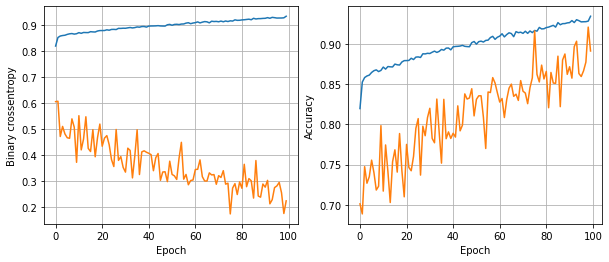

119/119 [==============================] - 0s 1ms/step - loss: 0.4513 - accuracy: 0.8536
64 nodes, dropout probability 0, learning rate 0.001, batch size 32


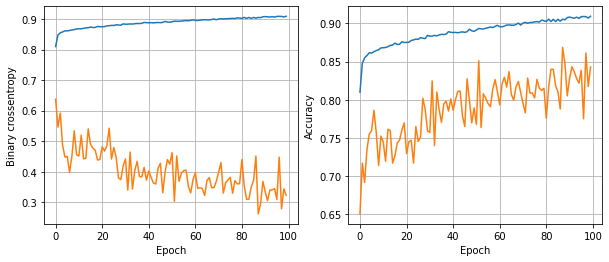

119/119 [==============================] - 0s 1ms/step - loss: 0.3387 - accuracy: 0.8733
64 nodes, dropout probability 0, learning rate 0.001, batch size 64


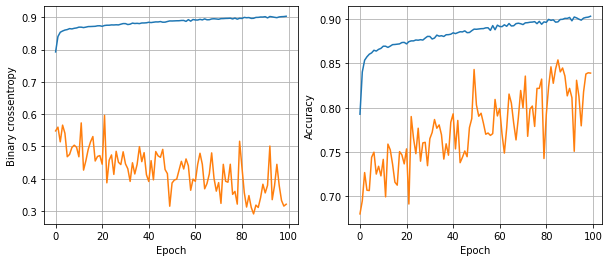

119/119 [==============================] - 0s 1ms/step - loss: 0.3352 - accuracy: 0.8672
64 nodes, dropout probability 0, learning rate 0.001, batch size 128


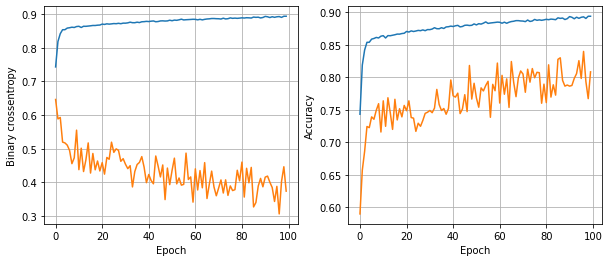

119/119 [==============================] - 0s 1ms/step - loss: 0.3227 - accuracy: 0.8659
64 nodes, dropout probability 0.2, learning rate 0.01, batch size 32


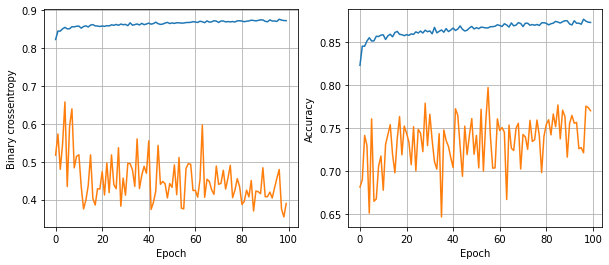

119/119 [==============================] - 0s 1ms/step - loss: 0.3262 - accuracy: 0.8715
64 nodes, dropout probability 0.2, learning rate 0.01, batch size 64


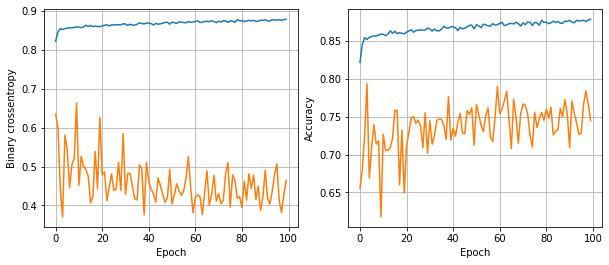

119/119 [==============================] - 0s 1ms/step - loss: 0.3149 - accuracy: 0.8725
64 nodes, dropout probability 0.2, learning rate 0.01, batch size 128


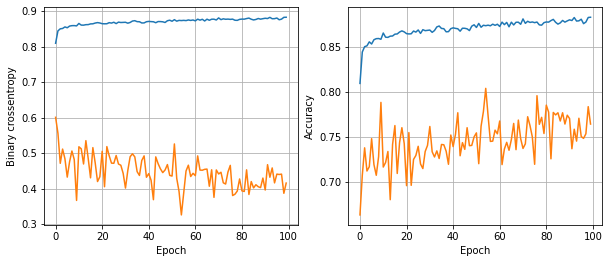

119/119 [==============================] - 0s 1ms/step - loss: 0.3069 - accuracy: 0.8741
64 nodes, dropout probability 0.2, learning rate 0.005, batch size 32


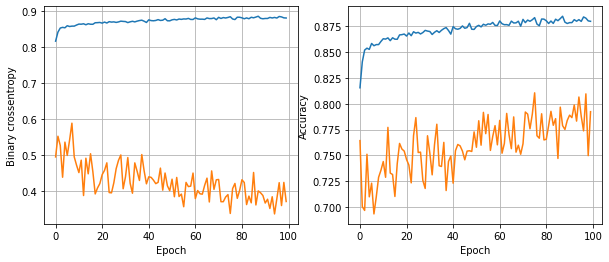

119/119 [==============================] - 0s 1ms/step - loss: 0.3060 - accuracy: 0.8754
64 nodes, dropout probability 0.2, learning rate 0.005, batch size 64


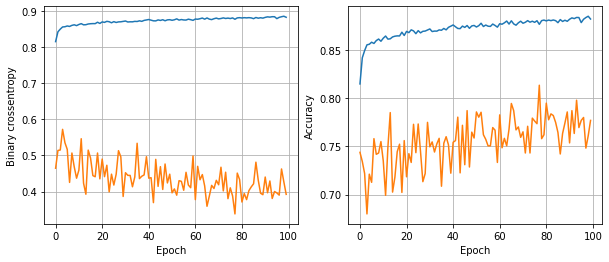

119/119 [==============================] - 0s 1ms/step - loss: 0.3027 - accuracy: 0.8788
64 nodes, dropout probability 0.2, learning rate 0.005, batch size 128


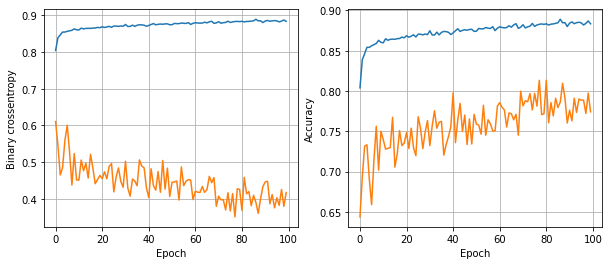

119/119 [==============================] - 0s 1ms/step - loss: 0.3021 - accuracy: 0.8775
64 nodes, dropout probability 0.2, learning rate 0.001, batch size 32


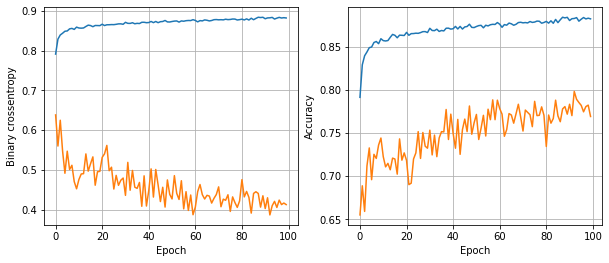

119/119 [==============================] - 0s 1ms/step - loss: 0.2997 - accuracy: 0.8722
64 nodes, dropout probability 0.2, learning rate 0.001, batch size 64


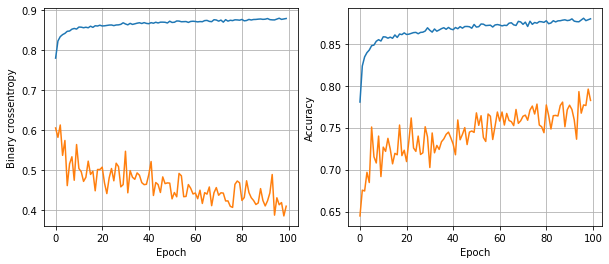

119/119 [==============================] - 0s 1ms/step - loss: 0.2988 - accuracy: 0.8780
64 nodes, dropout probability 0.2, learning rate 0.001, batch size 128


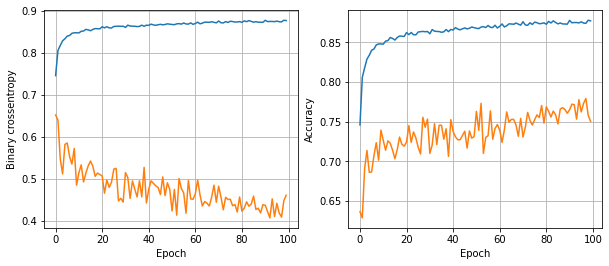

119/119 [==============================] - 0s 1ms/step - loss: 0.3009 - accuracy: 0.8751


In [29]:
least_val_loss = float('inf')
least_loss_model = None

epochs = 100

for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout probability {dropout_prob}, learning rate {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [30]:
y_pred4 = least_loss_model.predict(X_test)
y_pred4 = (y_pred4 > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 695us/step


In [32]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1317
           1       0.88      0.95      0.91      2487

    accuracy                           0.88      3804
   macro avg       0.89      0.85      0.87      3804
weighted avg       0.88      0.88      0.88      3804

